#### Jueves 8 de Mayo de 2025

## Árbol de Decisión ID3. ¿Es un buen día para surfear?

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
#Dataset

data = {
    'Día': [1, 2, 3],
    'OlasAltas': ['Sí', 'No', 'Sí'],
    'VientoFuerte': ['No', 'Sí', 'Sí'],
    'Temperatura': ['Alta', 'Baja', 'Alta'],
    'Surfear': ['Sí', 'No', 'No']
}

df = pd.DataFrame(data)
print("Dataset original: \n")
print(df)

Dataset original: 



,Día,OlasAltas,VientoFuerte,Temperatura,Surfear
0,1,Sí,No,Alta,Sí
1,2,No,Sí,Baja,No
2,3,Sí,Sí,Alta,No


In [4]:
#Codificación de variables categóricas a numéricas

le = LabelEncoder()
df_encoded = df.copy()
for columna in df.columns:
    df_encoded[columna] = le.fit_transform(df[columna])

print("\nDataset codificado: \n")
print(df_encoded)


Dataset codificado: 



,Día,OlasAltas,VientoFuerte,Temperatura,Surfear
0,0,1,0,0,1
1,1,0,1,1,0
2,2,1,1,0,0


In [5]:
#Separacion de carcaterísticas (X) y (y)
X = df_encoded.drop(['Día', 'Surfear'], axis=1)
y = df_encoded['Surfear']

In [8]:
#Entrenamiento del árbol de decisión
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())

Profundidad real del árbol: 1
Número de hojas: 2


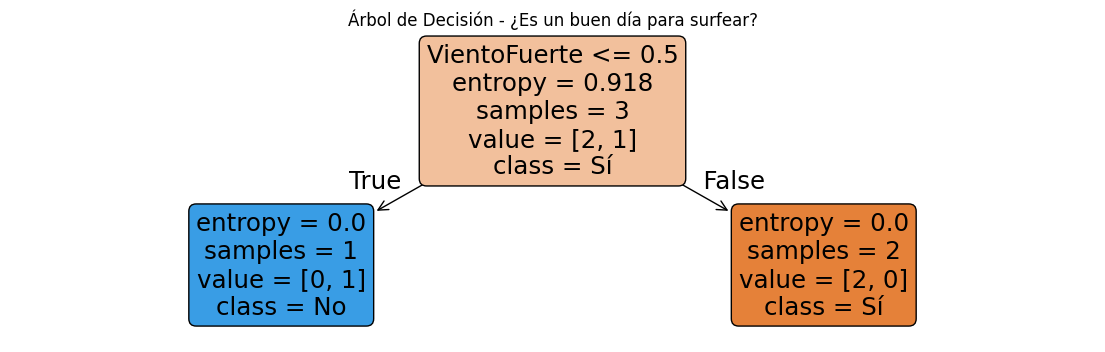

In [10]:
#Visualización del Árbol de Decisión
plt.figure(figsize=(14, 4))
plot_tree(
    modelo, 
    feature_names = X.columns,
    class_names = df['Surfear'].unique(),
    filled = True,
    rounded = True
)
plt.title('Árbol de Decisión - ¿Es un buen día para surfear?')
plt.show()

In [14]:
# Predicciones

# OlasAltas: 1=Sí 0=No
# VientoFuerte: 1=Sí 0=No
# Temperatura: 1=Alta 0=Baja 

print("PREDICCIÓN - ¿ES UN BUEN DÍA PARA SURFEAR?\n")

nuevo_dia = {
    'OlasAltas': 1,
    'VientoFuerte': 0,
    'Temperatura': 1
}

nuevo_df = pd.DataFrame([nuevo_dia])

for atributo, valor in nuevo_dia.items():
    print(f"{atributo}: {valor}")

prediccion = modelo.predict(nuevo_df)

print("\nPredicción para el nuevo día:")
if prediccion[0] == 1:
    print("\nSi puedes surfear")
else:
    print("\nNo debes surfear")

PREDICCIÓN - ¿ES UN BUEN DÍA PARA SURFEAR?

OlasAltas: 1
VientoFuerte: 0
Temperatura: 1

Predicción para el nuevo día:

Si puedes surfear


In [15]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in zip(X.columns, importancias):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

OlasAltas -> 0.0
VientoFuerte -> 1.0
Temperatura -> 0.0


####  Calcula la ganancia de información para "OlasAltas". ¿Por qué "VientoFuerte" podría ser importante?

In [ ]:
# Con el cálculo anterior la ganancia de información para OlasAltas es de 0.0. VientoFuerte tiene 1.0, y es
# importante porque tiene  mayor importancia dentro del árbol, es el mayor de los tres. Influye más en 
# la decisión de surfear o más.